
In this lesson, I am going to Predicting Weight of the Fish.




# Importing & Understanding dataset

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
import numpy as np                # mathematical calculations
import pandas as pd               # manipulation of raw data 
import matplotlib.pyplot as plt   # plotting graphs
%matplotlib inline  

In [3]:
path ='/gdrive/My Drive/Online_ML : Weekends Nov 2020/Assignments/Data/'

In [4]:
fish_data = pd.read_csv(path+'Fish.csv')

In [5]:
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
fish_data.shape

(159, 7)

The data has 7 columns and 159 row of data. we have to build model to predict weight of the fish from other features. so right now we have 6 features.

In [7]:
fish_data.info

<bound method DataFrame.info of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [8]:
fish_data.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

# Encoding data

In [9]:
# Species column is text so we should encoding this data before processing further

from sklearn.preprocessing import LabelEncoder
Species_le = LabelEncoder()
fish_data['Species'] = Species_le.fit_transform(fish_data['Species'])

In [10]:
fish_data.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340
5,0,450.0,26.8,29.7,34.7,13.6024,4.9274
6,0,500.0,26.8,29.7,34.5,14.1795,5.2785
7,0,390.0,27.6,30.0,35.0,12.6700,4.6900
8,0,450.0,27.6,30.0,35.1,14.0049,4.8438
9,0,500.0,28.5,30.7,36.2,14.2266,4.9594


In [11]:
fish_data.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,5,12.2,11.5,12.2,13.4,2.0904,1.3936
155,5,13.4,11.7,12.4,13.5,2.4300,1.2690
156,5,12.2,12.1,13.0,13.8,2.2770,1.2558
157,5,19.7,13.2,14.3,15.2,2.8728,2.0672
158,5,19.9,13.8,15.0,16.2,2.9322,1.8792





# Features Scaling

In [12]:
fish = (fish_data - fish_data.mean())/(fish_data.max()-fish_data.min())

In [13]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,-0.377358,-0.094743,-0.059168,-0.054831,-0.020727,0.147952,-0.056028
1,-0.377358,-0.065652,-0.043634,-0.038468,-0.000457,0.203673,-0.015771
2,-0.377358,-0.035349,-0.045576,-0.034831,-0.002146,0.197741,0.039272
3,-0.377358,-0.021410,0.001026,0.010623,0.038395,0.218184,0.005358
4,-0.377358,0.019196,0.004909,0.010623,0.046840,0.201584,0.100997


# Seperate X and Y from data

In [14]:
X = fish.drop(columns = ['Weight'])
y = fish.iloc[:, 1:2]

Adding a bias or intercept term to the training data is often required in machine learning models,in this cases where the relationship between the features and the target variable is not purely linear. The bias term allows the model to capture the constant term or the y-intercept in the equation of a linear model.

By adding value 1 into Bias which will helps the model account for the offset or baseline value that affects the target variable independently of the other features. This bias term ensures that the model can make predictions even when all the feature values are zero.

By including a bias term in the training data, you allow the model to learn an offset or baseline value and improve its flexibility in capturing non-linear relationships and variations in the data. It helps in fitting the model more accurately to the training data and can lead to better predictions on unseen data.

Adding a bias term is commonly done in linear models, such as linear regression, logistic regression, and neural networks. It helps account for the constant term and allows the model to learn and adjust both the slope and intercept of the predicted relationship between the features and the target variable.

In [15]:
X.insert(0,'Bias',1)
X.head()

,Bias,Species,Length1,Length2,Length3,Height,Width
0,1,-0.377358,-0.059168,-0.054831,-0.020727,0.147952,-0.056028
1,1,-0.377358,-0.043634,-0.038468,-0.000457,0.203673,-0.015771
2,1,-0.377358,-0.045576,-0.034831,-0.002146,0.197741,0.039272
3,1,-0.377358,0.001026,0.010623,0.038395,0.218184,0.005358
4,1,-0.377358,0.004909,0.010623,0.046840,0.201584,0.100997


In [16]:
X.shape, y.shape

((159, 7), (159, 1))

# Splitting the data into the training and testing data

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [18]:
X_train = np.matrix(X_train)
y_train = np.matrix(y_train)

In [19]:
theta = np.matrix(np.zeros(7))

In [20]:
theta.shape, X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1, 7), (119, 7), (119, 1), (40, 7), (40, 1))

\# Defining the Error & Gradient Descent Function

Implementing gradient descent involves computing the partial derivatives of the error function with respect to each parameter and updating the parameter values accordingly. This process is repeated iteratively until convergence is achieved or a predefined stopping criterion is met. The learning rate, which determines the step size of each update, is an important hyperparameter that needs to be carefully chosen to balance convergence speed and stability.

By defining the error function and implementing gradient descent, you enable the model to learn and adjust its parameters based on the training data, thereby improving its ability to predict the weight of fish accurately.

In [21]:
def computeError(x,y,theta):
  inner = np.power(((x*theta.T)-y),2)
  return np.sum(inner)/(2*len(x))

In [22]:
computeError(X_train,y_train,theta)

0.02223312262951974

In [23]:
learn_rate = 0.001
iters = 50000
def gradientDescent(x,y,theta,learn_rate,iters):
  temp = np.matrix(np.zeros(theta.shape))
  parameters = theta.shape[1]
  cost =[]

  for i in range(iters):
    error = (x*theta.T)-y
    
    for j in range(parameters):
      gradient = np.multiply(error,x[:,j])
      temp[0,j] = theta[0,j] - ((learn_rate/len(x))*np.sum(gradient))  #assign it to the temp matrix
    
    theta = temp 
    cost_iter = computeError(x,y,theta)

    cost.append(cost_iter)

  return theta,cost


In [24]:
new_theta,cost = gradientDescent(X_train,y_train,theta,learn_rate,iters)


Plot between cost & number of iterations

Text(0.5, 1.0, 'Error Vs Iterations')

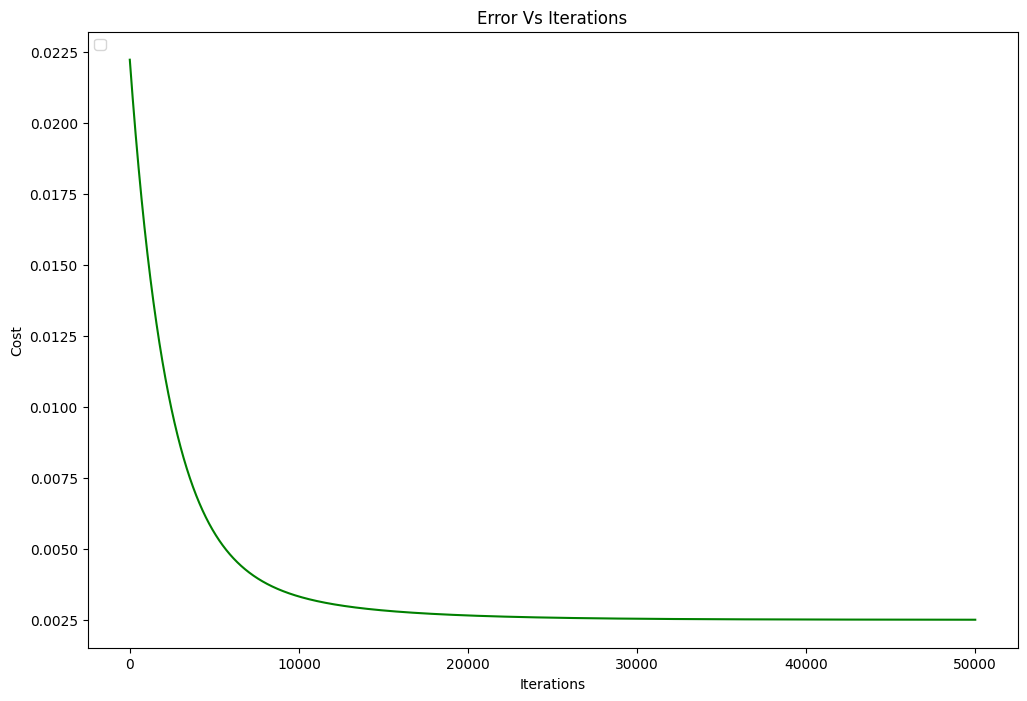

In [25]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters),cost,'g')
ax.legend(loc=2)
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error Vs Iterations')

In [26]:
#PREDECTING TRAINING DATASET

Train_model_weight = X_train *new_theta.T


In [27]:
#PREDECTING Test DATASET
X_test = np.matrix(X_test)
y_test = np.matrix(y_test)
Test_model_weight = X_test * new_theta.T


In [28]:
Test_model_weight

matrix([[ 0.24574181],
        [-0.14882793],
        [-0.09879097],
        [ 0.24586673],
        [-0.18958142],
        [-0.09103524],
        [-0.00608757],
        [ 0.08922602],
        [-0.12758153],
        [-0.02767897],
        [-0.18312562],
        [-0.12413555],
        [ 0.01296106],
        [ 0.1875595 ],
        [-0.11950828],
        [ 0.14133097],
        [-0.32528508],
        [ 0.44104846],
        [ 0.04488124],
        [-0.12561696],
        [ 0.21931976],
        [-0.05461399],
        [ 0.0422168 ],
        [-0.22086223],
        [ 0.15941376],
        [-0.02637351],
        [ 0.19651569],
        [ 0.26721841],
        [-0.30248213],
        [ 0.33858569],
        [ 0.2014846 ],
        [-0.08385477],
        [ 0.26793116],
        [-0.07603894],
        [ 0.23780322],
        [-0.1400854 ],
        [-0.15497165],
        [ 0.25865131],
        [-0.08840053],
        [ 0.27195506]])

# Computation of error and accuracy for training data & test data

In [29]:
Train_model_weight.shape


(119, 1)

In [30]:
y_train.shape

(119, 1)

In [36]:
Train_model_weight = np.squeeze(Train_model_weight)
y_train = np.squeeze(y_train)



In [37]:
Train_model_weight = np.squeeze(Train_model_weight)
y_train = np.squeeze(y_train)


In [39]:
y_train = y_train.reshape(-1)


In [42]:
y_train.shape

(1, 119)

In [43]:
Train_model_weight.shape

(119,)

In [51]:

y_train = np.transpose(y_train)
y_train.shape

(119, 1)

In [53]:
from sklearn.metrics import mean_absolute_error

# Convert to numpy arrays
Train_model_weight = np.asarray(Train_model_weight)
y_train = np.asarray(y_train)

# Calculate the mean absolute error
Train_error = mean_absolute_error(Train_model_weight, y_train)
Train_accuracy = 1 - Train_error

# Print the results
print('Train error = {}%'.format(round(Train_error * 100, 2)))
print('Train accuracy = {}%'.format(round(Train_accuracy * 100, 2)))


Train error = 5.49%
Train accuracy = 94.51%


In [55]:
# Convert to numpy arrays
Test_model_weight = np.asarray(Test_model_weight)
y_test = np.asarray(y_test)

#Test
Test_error = mean_absolute_error(Test_model_weight, y_test)
Test_accuracy =  1 - Test_error

print('Test_error ={} % '.format((round(Test_error*100,2))))
print('Test accuracy ={} % '.format((round(Test_accuracy*100,2))))

Test_error =6.32 % 
Test accuracy =93.68 % 


In [57]:
from sklearn.linear_model import LinearRegression

# Convert to numpy arrays
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

# Create and fit the LinearRegression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

The train_score or test_score is a value between 0 and 1, where 1 represents a perfect fit of the model to the training data, and 0 indicates that the model does not explain any of the variance in the target variable. A higher train_score indicates a better fit of the model to the training data, suggesting that the model captures a larger proportion of the variance in the target variable.

In [58]:
y_train_pred = model.predict(X_train)
train_score = model.score(X_train, y_train)
train_score

0.894623776676294

In [60]:
y_test_pred = model.predict(np.asarray(X_test))
test_score = model.score(np.asarray(X_test), np.asarray(y_test))
test_score

0.889871047730383

In [61]:
y_train_pred.shape

(119, 1)

In [63]:

# Reshape y_test_pred to 1-dimensional array
y_test_pred = np.squeeze(y_test_pred)

# Convert y_test_pred to a DataFrame
predictions_df = pd.DataFrame({'y_test_pred': y_test_pred})

# Export predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)


In [64]:


# Read the CSV file into a DataFrame
predictions_df = pd.read_csv('predictions.csv')

# Access the predictions column
y_test_pred = predictions_df['y_test_pred']

# Continue working with the predictions as needed


In [65]:

# Read the CSV file into a DataFrame
predictions_df = pd.read_csv('predictions.csv')

# Print the contents of the DataFrame
print(predictions_df)


    y_test_pred
0      0.243704
1     -0.170885
2     -0.103906
3      0.269330
4     -0.190395
5     -0.085995
6      0.013202
7      0.073196
8     -0.092765
9      0.000163
10    -0.197472
11    -0.159623
12     0.018070
13     0.178119
14    -0.116486
15     0.143005
16    -0.309893
17     0.455640
18     0.053713
19    -0.137524
20     0.251285
21    -0.080290
22    -0.007088
23    -0.239344
24     0.162975
25    -0.022809
26     0.191124
27     0.302657
28    -0.310947
29     0.337261
30     0.198205
31    -0.108971
32     0.300147
33    -0.095000
34     0.255635
35    -0.147002
36    -0.164605
37     0.264376
38    -0.101154
39     0.290175


The prediction of fish weight can have various business applications in the fishing industry, aquatic research, and fish farming. Some potential business applications of predicting fish weight include:

Fisheries Management: Predicting fish weight can help in assessing fish populations, estimating biomass, and making informed decisions related to fisheries management. This information can aid in setting fishing quotas, determining sustainable fishing practices, and implementing conservation measures.

Aquaculture and Fish Farming: Predicting fish weight can be valuable in aquaculture and fish farming operations. It can assist in monitoring fish growth, optimizing feeding regimes, and estimating the harvest size. This information enables fish farmers to manage their stocks effectively, plan production schedules, and optimize resource utilization.

Market Pricing and Sales: Accurate predictions of fish weight can contribute to better pricing strategies in the seafood industry. It allows suppliers, wholesalers, and retailers to estimate the weight of fish accurately, thereby helping in pricing decisions and ensuring fair market transactions. Additionally, it enables sellers to provide detailed product information to buyers, enhancing transparency and trust in the seafood market.

Research and Scientific Studies: Predicting fish weight is essential for scientific studies and research projects focused on fish biology, ecology, and behavior. It enables researchers to collect standardized data on fish size and weight, facilitating comparative analyses, understanding population dynamics, and studying the effects of environmental factors on fish growth.

Fishing Tournaments and Competitions: In fishing tournaments and competitions, predicting fish weight plays a crucial role in determining winners and rankings. Accurate weight estimation allows participants to showcase their fishing skills, fosters healthy competition, and enhances the overall experience of the event.

Fish Processing and Distribution: Predicting fish weight can aid in fish processing operations, such as filleting, portioning, and packaging. By estimating the weight accurately, processors can ensure consistent product sizes and weights, improve efficiency in processing, and optimize resource allocation in the production line.


